In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
input1=pd.read_excel("C:\\Users\\AYUSH SONY\\Desktop\\DATA Science Assignment\\Input1.xlsx")

In [3]:
input1.head()

,S No,Name,Team Name,User ID
0,1,Soumita M,Winning Culture Lab,280
1,2,Subhangi 0,Winning Culture Lab,75
2,3,Nitin Shane,Winning Culture Lab,1124
3,4,Merwin,Mentor,295
4,5,fardinkamal62,Human Capital Lab,263


In [4]:
input2=pd.read_excel("C:\\Users\\AYUSH SONY\\Desktop\\DATA Science Assignment\\Input2.xlsx")

In [5]:
input2.head()

,S No,name,uid,total_statements,total_reasons
0,1,Soumita M,280,13,21
1,2,Subhangi 0,75,13,16
2,3,Nitin Shane,1124,12,11
3,4,Merwin,295,13,12
4,5,fardinkamal62,263,2,2


In [6]:
df=pd.merge(left=input1, right=input2, left_on='User ID', right_on='uid', how='inner', )

In [7]:
df.head()

,S No_x,Name,Team Name,User ID,S No_y,name,uid,total_statements,total_reasons
0,1,Soumita M,Winning Culture Lab,280,1,Soumita M,280,13,21
1,2,Subhangi 0,Winning Culture Lab,75,2,Subhangi 0,75,13,16
2,3,Nitin Shane,Winning Culture Lab,1124,3,Nitin Shane,1124,12,11
3,4,Merwin,Mentor,295,4,Merwin,295,13,12
4,5,fardinkamal62,Human Capital Lab,263,5,fardinkamal62,263,2,2


In [8]:
data=df[['Name','Team Name','User ID','total_statements','total_reasons']]

In [9]:
data.head()

,Name,Team Name,User ID,total_statements,total_reasons
0,Soumita M,Winning Culture Lab,280,13,21
1,Subhangi 0,Winning Culture Lab,75,13,16
2,Nitin Shane,Winning Culture Lab,1124,12,11
3,Merwin,Mentor,295,13,12
4,fardinkamal62,Human Capital Lab,263,2,2


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 0 to 20
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              21 non-null     object
 1   Team Name         21 non-null     object
 2   User ID           21 non-null     int64 
 3   total_statements  21 non-null     int64 
 4   total_reasons     21 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 840.0+ bytes


In [11]:
data.shape

(21, 5)

In [12]:
data.describe()

,User ID,total_statements,total_reasons
count,21.000000,21.000000,21.000000
mean,897.428571,6.952381,7.904762
std,1233.568140,4.510834,5.365676
min,69.000000,2.000000,2.000000
25%,266.000000,3.000000,4.000000
50%,302.000000,6.000000,7.000000
75%,539.000000,11.000000,9.000000
max,3408.000000,16.000000,21.000000


# Task 1:-
    Rank the team name on the basis of sum of average of total statements and total reasons.

In [13]:
new_data=data.groupby(by='Team Name')['total_statements','total_reasons'].mean().reset_index()

In [14]:
new_data

,Team Name,total_statements,total_reasons
0,BrandTech Lab,7.000000,7.000000
1,Brandtech Lab,2.000000,4.000000
2,Growpital,5.000000,5.666667
3,Human Capital Lab,2.000000,4.500000
4,Kringle,4.500000,4.500000
5,Mentor,7.333333,7.666667
6,Student Unicorn Lab,7.333333,6.333333
7,Tech Lab,9.000000,10.000000
8,Winning Culture Lab,12.666667,16.000000


In [15]:
def fun(a,b):
    return a+b

In [16]:
new_data['sumofavg']=new_data.apply(lambda x: fun(a=x['total_statements'], b=x['total_reasons']), axis=1)

In [17]:
new_data['sumofavg']

0    14.000000
1     6.000000
2    10.666667
3     6.500000
4     9.000000
5    15.000000
6    13.666667
7    19.000000
8    28.666667
Name: sumofavg, dtype: float64

In [18]:
new_data

,Team Name,total_statements,total_reasons,sumofavg
0,BrandTech Lab,7.000000,7.000000,14.000000
1,Brandtech Lab,2.000000,4.000000,6.000000
2,Growpital,5.000000,5.666667,10.666667
3,Human Capital Lab,2.000000,4.500000,6.500000
4,Kringle,4.500000,4.500000,9.000000
5,Mentor,7.333333,7.666667,15.000000
6,Student Unicorn Lab,7.333333,6.333333,13.666667
7,Tech Lab,9.000000,10.000000,19.000000
8,Winning Culture Lab,12.666667,16.000000,28.666667


In [19]:
new_data.sort_values('sumofavg', ascending=False, inplace=True)

In [20]:
new_data['Rank']=new_data["sumofavg"].rank(ascending=False)

In [21]:
new_data

,Team Name,total_statements,total_reasons,sumofavg,Rank
8,Winning Culture Lab,12.666667,16.000000,28.666667,1.0
7,Tech Lab,9.000000,10.000000,19.000000,2.0
5,Mentor,7.333333,7.666667,15.000000,3.0
0,BrandTech Lab,7.000000,7.000000,14.000000,4.0
6,Student Unicorn Lab,7.333333,6.333333,13.666667,5.0
2,Growpital,5.000000,5.666667,10.666667,6.0
4,Kringle,4.500000,4.500000,9.000000,7.0
3,Human Capital Lab,2.000000,4.500000,6.500000,8.0
1,Brandtech Lab,2.000000,4.000000,6.000000,9.0


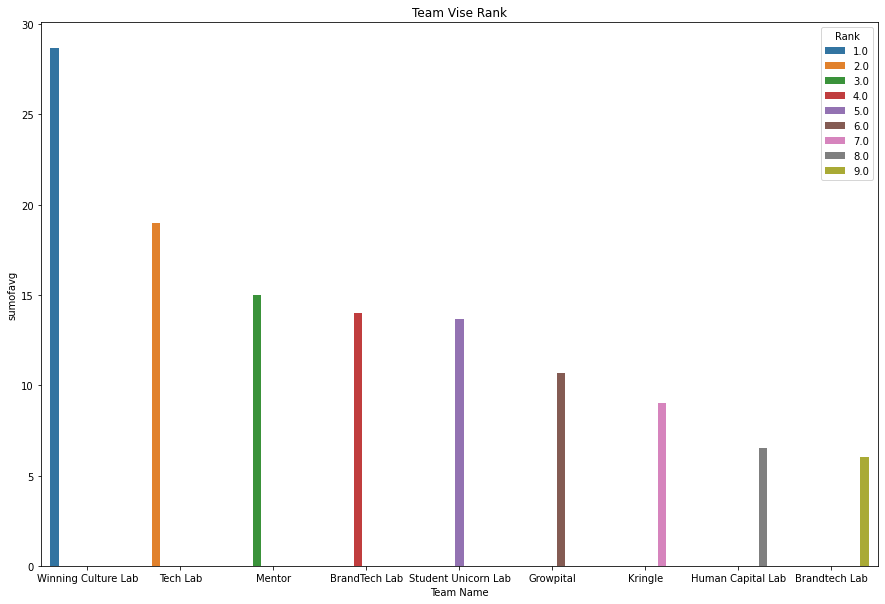

In [22]:
plt.figure(figsize=(15,10))
sns.barplot(x='Team Name', y='sumofavg', data=new_data, hue='Rank', )
plt.title('Team Vise Rank')
plt.show()

In [23]:
new_data.columns

Index(['Team Name', 'total_statements', 'total_reasons', 'sumofavg', 'Rank'], dtype='object')

In [24]:
leaderboard1=new_data[['Rank', 'Team Name', 'total_statements', 'total_reasons']]

In [25]:
leaderboard1

,Rank,Team Name,total_statements,total_reasons
8,1.0,Winning Culture Lab,12.666667,16.000000
7,2.0,Tech Lab,9.000000,10.000000
5,3.0,Mentor,7.333333,7.666667
0,4.0,BrandTech Lab,7.000000,7.000000
6,5.0,Student Unicorn Lab,7.333333,6.333333
2,6.0,Growpital,5.000000,5.666667
4,7.0,Kringle,4.500000,4.500000
3,8.0,Human Capital Lab,2.000000,4.500000
1,9.0,Brandtech Lab,2.000000,4.000000


# Taks 2:-
     Every individual ranking is given on the basis of total number of statements and reasons.

In [26]:
data.head()

,Name,Team Name,User ID,total_statements,total_reasons
0,Soumita M,Winning Culture Lab,280,13,21
1,Subhangi 0,Winning Culture Lab,75,13,16
2,Nitin Shane,Winning Culture Lab,1124,12,11
3,Merwin,Mentor,295,13,12
4,fardinkamal62,Human Capital Lab,263,2,2


In [27]:
data['TNSAR']=data['total_statements']+data['total_reasons']

In [28]:
data['TNSAR']

0     34
1     29
2     23
3     25
4      4
5      9
6      6
7     18
8     14
9     16
10    35
11     6
12    14
13     6
14     4
15    19
16    13
17    10
18     9
19     4
20    14
Name: TNSAR, dtype: int64

In [29]:
data

,Name,Team Name,User ID,total_statements,total_reasons,TNSAR
0,Soumita M,Winning Culture Lab,280,13,21,34
1,Subhangi 0,Winning Culture Lab,75,13,16,29
2,Nitin Shane,Winning Culture Lab,1124,12,11,23
3,Merwin,Mentor,295,13,12,25
4,fardinkamal62,Human Capital Lab,263,2,2,4
5,__riddhi_213_,Human Capital Lab,504,2,7,9
6,Rohit Dutta,Mentor,266,3,3,6
7,imshawan,Tech Lab,71,9,9,18
8,Anuraj_Saini,BrandTech Lab,342,7,7,14
9,sharath,Student Unicorn Lab,3367,8,8,16


In [30]:
data.sort_values(by='TNSAR', ascending=False, inplace=True)

In [46]:
data['Rank']=data['TNSAR'].rank(ascending=False, method='first')

In [47]:
data

,Name,Team Name,User ID,total_statements,total_reasons,TNSAR,Rank
10,Ronak 0,Tech Lab,302,16,19,35,1.0
0,Soumita M,Winning Culture Lab,280,13,21,34,2.0
1,Subhangi 0,Winning Culture Lab,75,13,16,29,3.0
3,Merwin,Mentor,295,13,12,25,4.0
2,Nitin Shane,Winning Culture Lab,1124,12,11,23,5.0
15,Ayisha,Student Unicorn Lab,3406,11,8,19,6.0
7,imshawan,Tech Lab,71,9,9,18,7.0
9,sharath,Student Unicorn Lab,3367,8,8,16,8.0
12,Saurabh,Mentor,271,6,8,14,9.0
20,devmenkr,Kringle,360,7,7,14,10.0


In [50]:
data.sort_values(by=['Rank', 'Name'], ascending=[True, True], inplace=True)

In [51]:
data

,Name,Team Name,User ID,total_statements,total_reasons,TNSAR,Rank
10,Ronak 0,Tech Lab,302,16,19,35,1.0
0,Soumita M,Winning Culture Lab,280,13,21,34,2.0
1,Subhangi 0,Winning Culture Lab,75,13,16,29,3.0
3,Merwin,Mentor,295,13,12,25,4.0
2,Nitin Shane,Winning Culture Lab,1124,12,11,23,5.0
15,Ayisha,Student Unicorn Lab,3406,11,8,19,6.0
7,imshawan,Tech Lab,71,9,9,18,7.0
9,sharath,Student Unicorn Lab,3367,8,8,16,8.0
12,Saurabh,Mentor,271,6,8,14,9.0
20,devmenkr,Kringle,360,7,7,14,10.0


In [52]:
data.columns

Index(['Name', 'Team Name', 'User ID', 'total_statements', 'total_reasons',
       'TNSAR', 'Rank'],
      dtype='object')

In [53]:
leaderboard2=data[['Rank', 'Name', 'User ID', 'total_statements', 'total_reasons']]

In [54]:
leaderboard2

,Rank,Name,User ID,total_statements,total_reasons
10,1.0,Ronak 0,302,16,19
0,2.0,Soumita M,280,13,21
1,3.0,Subhangi 0,75,13,16
3,4.0,Merwin,295,13,12
2,5.0,Nitin Shane,1124,12,11
15,6.0,Ayisha,3406,11,8
7,7.0,imshawan,71,9,9
9,8.0,sharath,3367,8,8
12,9.0,Saurabh,271,6,8
20,10.0,devmenkr,360,7,7


# Now we are making two leaderboards into two different sheets in a single Excel file. 

In [64]:
writer=pd.ExcelWriter("C:\\Users\\AYUSH SONY\\Desktop\\DATA Science Assignment\\Output.xlsx", engine='xlsxwriter')

In [65]:
leaderboard1.to_excel(writer, sheet_name='leaderboard1', index=False)
leaderboard2.to_excel(writer, sheet_name='leaderboard2', index=False)

In [66]:
writer.save()